# 3nd Assignment - Numerical optimization and large scale linear algebra

---

> Nikos Tsoukalelis, Data Science Part Time student, 2022 <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

> #### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Assignment : Construct an algorithm for classification of handwritten digits. Using a training set, and compute the SVD of each class matrix. Use the first few (5-20) singular vectors as basis and classify unknown test digits according to how well they can be represented in terms of the respective bases (use the relative residual vector in the lest squares problem as a measure).

>#### We read the data. Every column is an image.

In [2]:
azip = pd.read_excel('data.xlsx',sheet_name='azip', header=None)
#azip = pd.read_excel(data, 'azip')
#df2 = pd.read_excel(xlsx, 'Sheet2')
azip

C:\Users\cob_n\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
1,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
2,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
3,-1.000,-0.813,-1.000,-1.0,-1.000,-1.0,-0.830,-1.0,-1.000,-1.0,...,-1.000,-0.567,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
4,-1.000,-0.671,-1.000,-1.0,-1.000,-1.0,0.442,-1.0,-1.000,-1.0,...,-0.986,-0.064,-1.000,-1.0,-1.0,-1.000,-1.0,-0.948,-1.0,-0.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.991,0.126,-0.179,-1.0,0.439,-1.0,-1.000,-1.0,-0.811,-1.0,...,-1.000,-1.000,-0.633,-1.0,-1.0,-0.974,-1.0,-1.000,-1.0,-1.000
252,-1.000,-0.095,-1.000,-1.0,-0.199,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-0.782,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
253,-1.000,-0.671,-1.000,-1.0,-0.883,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
254,-1.000,-0.828,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000


>#### Then we put every image (located in each column) in a one-column dataframe and each image is an element of this 1-column dataframe (in the position 1,1 exists an image, in the position 2,1 the second one and so on).
>#### Although before doing that we apply the function given to us in Matlab, after converting into Python.

In [3]:
col_number=np.arange(0,1707,1)
all_images=[]
for i in col_number:
    img=azip.iloc[:,i].values
    img_test=np.reshape(img, (16, 16))
    img_test=img_test-np.amin(np.amin(img_test))*np.ones(np.shape(img_test))
    img_test=(20/np.amax(np.amax(img_test)))*img_test
    
    all_images.append(img_test)

handwritten_df=pd.DataFrame()
handwritten_df['all_images_numbers']=pd.Series(all_images)

handwritten_df

,all_images_numbers
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.69, 18...."
1,"[[0.0, 0.0, 0.0, 1.8700000000000006, 3.2899999..."
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 7.27, 16.8400000000..."
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.7199999999999995,..."
...,...
1702,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.1099999999999999,..."
1703,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.39000000000000035..."
1704,"[[0.0, 0.0, 0.0, 0.0, 0.5200000000000005, 6.93..."
1705,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.9399999999999995,..."


In [4]:
# code to find the numbers that devide 1,707 to create a correct array
#numb = list(range(1, 1000))
#numb_arr = np.array(numb)
#numbers_to_use=[]
#for l in numb_arr:
#    modulo=1707%l
#    #div=1707/l
#    #int_check=isinstance(div, int)
#    if modulo==0: #and int_check==True:
#        numbers_to_use.append(l)
#numbers_to_use

>#### Then we display all the numbers creating a new array, containing the images (handwritten numbers)

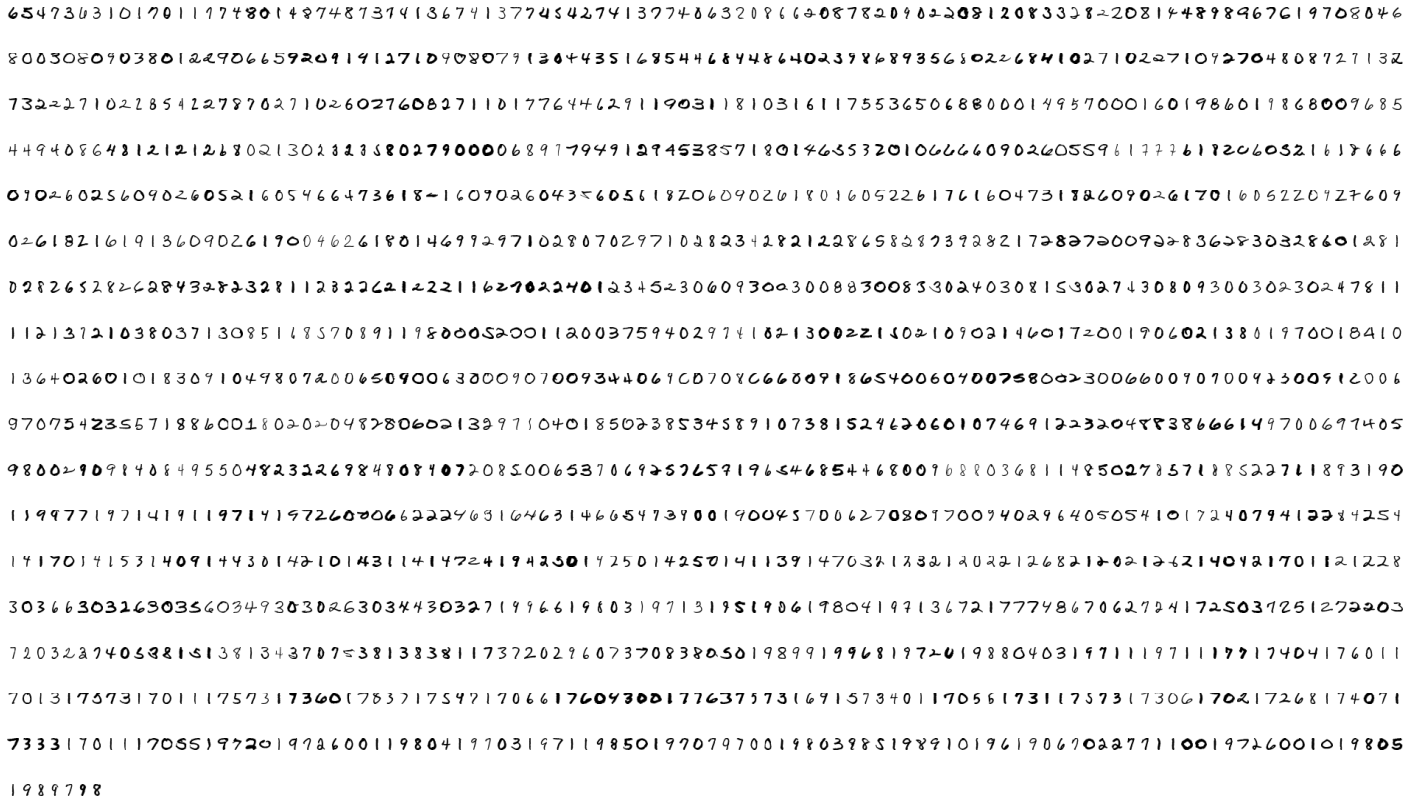

In [5]:
sample=handwritten_df.head()
fig1 = plt.figure(figsize=(25, 15))
rows = 18
columns = 100
rows_numb_sample=np.arange(0,1707,1)
for p in rows_numb_sample:
    fig1.add_subplot(rows, columns, p+1)
  
    # showing image
    plt.imshow(handwritten_df.iloc[p,0],cmap='binary')
    plt.axis('off')
        

> #### We then convert our dataset in an array so we can reshape it.

In [6]:
all_images=np.asarray(all_images)
all_images=np.reshape(all_images,(1707, 16*16))
all_images=all_images.T
all_images.shape

(256, 1707)

> #### Next step is to read the test data from the file given and follow the same procedure using the function that was given (in Matlab) for the processing of the data/images.


In [7]:
testzip = pd.read_excel('data.xlsx',sheet_name='testzip', header=None)

col_number=np.arange(0,2007,1)
all_images_test=[]
for i in col_number:
    img=testzip.iloc[:,i].values
    img_test=np.reshape(img, (16, 16))
    img_test=img_test-np.amin(np.amin(img_test))*np.ones(np.shape(img_test))
    img_test=(20/np.amax(np.amax(img_test)))*img_test
    
    all_images_test.append(img_test)
    
all_images_test=np.asarray(all_images_test)
all_images_test=np.reshape(all_images_test,(2007, 16*16))
all_images_test=all_images_test.T
all_images_test.shape

C:\Users\cob_n\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(256, 2007)

>#### Then we split our data to training and test dataset.

In [8]:
x_train = pd.DataFrame(all_images)
y_train = pd.read_excel('data.xlsx',sheet_name='dzip', header=None)

x_test = pd.DataFrame(all_images_test)
y_test = pd.read_excel('data.xlsx',sheet_name='dtest', header=None)

> #### We then create the A matrices that we are going to use for our SVD procedure.
> #### We also create the  U, S, $ V^T $ matrices.

In [9]:
alpha_matrix={}
for i in range(10):
    alpha_matrix.update({"A"+str(i):x_train.loc[:,list(y_train.loc[0,:]==i)]})

left_ones={}
ones_matrix={}
right_ones={}
for i in range(10):
    U, S, V_transpose = svd(alpha_matrix['A'+str(i)], full_matrices=False)
    left_ones.update({"U"+str(i):U})
    ones_matrix.update({"S"+str(i):S})
    right_ones.update({"V_transpose"+str(i):V_transpose})

> #### We want to use the first singular vectors as basis and classify unknown test digits according to how well they can be represented in terms of the respective bases (using the relative residual vector in the lest squares problem as a measure).  $$ min_{x_i}\lVert z - \sum_{i=1}^k x_iu_i )\lVert = min_x \lVert z - U_kx \lVert) $$ 
$$ x = (U_{k}^T U_k)^{-1} U_{k}^T=U_{k}^Tz $$ 
>#### So the residual becomes: $$ \lVert (I - U_{k}U_{k}^T)z \lVert$$ 
> #### So this is what we implement below

In [10]:
I = np.eye(x_test.shape[0])
k=np.arange(5,21)
length=x_test.shape[1]
predictions=np.empty((y_test.shape[1],0), dtype = int)
for m in list(k):
    prediction = []
    for i in range(length):
        residuals = []
        for j in range(10):
            U=left_ones["U"+str(j)][:,0:m]
            res=norm( np.dot(I-np.dot(U,U.T), x_test[i]  ))
            residuals.append(res)
        index_min = np.argmin(residuals)
        prediction.append(index_min)
        
    prediction=np.array(prediction)
    predictions=np.hstack((predictions,prediction.reshape(-1,1)))

> #### We then print the scores table for the different number of basis vectors.

In [11]:
scores=[]
for i in range(len(k)):
    score=accuracy_score(y_test.loc[0,:],predictions[:,i])
    scores.append(score)

scores_df= pd.DataFrame(scores,columns =['scores'])
scores_df['number_of_vectors']=k
scores_df

,scores,number_of_vectors
0,0.909317,5
1,0.912805,6
2,0.924763,7
3,0.924763,8
4,0.925760,9
5,0.932237,10
6,0.931241,11
7,0.933732,12
8,0.932735,13
9,0.938714,14


> #### As a test we also print the singular matrices to have a visual on what do we get. We want to confirm that the first position value will describe clearer the number.

<ipython-input-12-20afb14e23e3>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(10/ columns + 1, columns, i + 1)


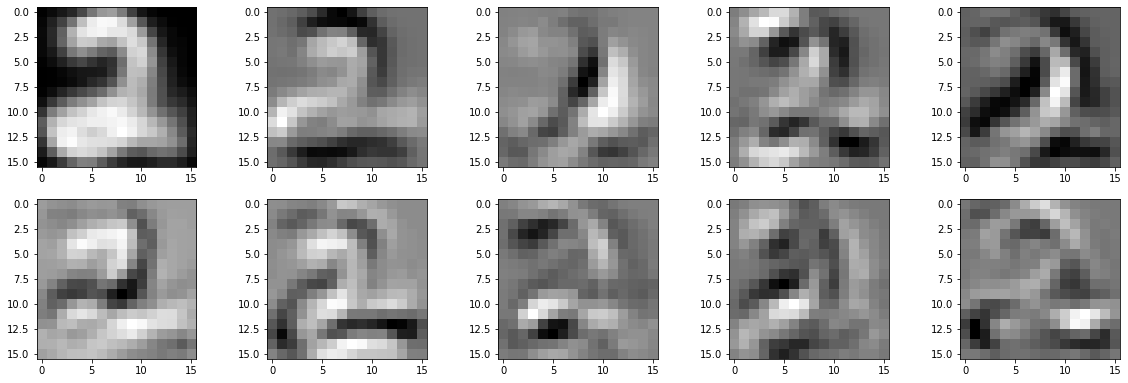

In [12]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(10):
    plt.subplot(10/ columns + 1, columns, i + 1)
    plt.imshow(left_ones["U2"][:,i].reshape(16,16),cmap='binary')

> #### To have also a better understanding on the prediction and how well our model worked we print the classification report, containing the precision, recall and f1-score metrics.
> #### As we can see the model performs well for 0,1, and 6.

In [13]:
print(classification_report(y_test.loc[0,:],predictions[:,7]))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.97      0.98      0.98       264
           2       0.96      0.90      0.93       198
           3       0.92      0.84      0.88       166
           4       0.91      0.92      0.91       200
           5       0.89      0.88      0.88       160
           6       0.98      0.95      0.96       170
           7       0.94      0.94      0.94       147
           8       0.92      0.93      0.92       166
           9       0.90      0.93      0.91       177

    accuracy                           0.93      2007
   macro avg       0.93      0.93      0.93      2007
weighted avg       0.93      0.93      0.93      2007



> #### We expect that there are some difficult numbers to be classified so we print the ones that could not be classified correctly, due to the bad handwriting.

<ipython-input-14-ec1e0e5305f9>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(10/ columns + 1, columns, i-1)


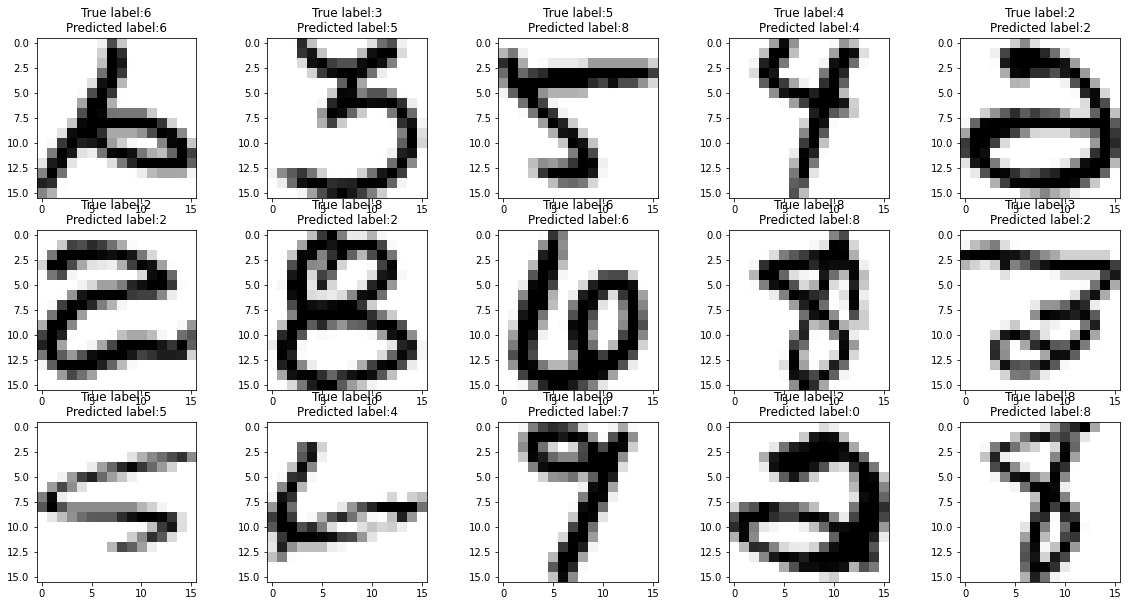

In [14]:
not_classified = np.where(y_test.loc[0,:] != predictions[:,1])
plt.figure(figsize=(20,10))
columns = 5
for i in range(2,17):
    not_classified_ID=not_classified[0][i]
    image=x_test[not_classified_ID]
    
    plt.subplot(10/ columns + 1, columns, i-1)
    plt.imshow(image.to_numpy().reshape(16,16),cmap='binary')
    plt.title("True label:"+str(y_test.loc[0,not_classified_ID]) + '\n'+ "Predicted label:"+str(predictions[not_classified_ID,12]))

> #### We also print the scores results vs the number of basis vectors to get a better understanding on the results.
> #### We can detect that for k=14 we get the best accuracy for our model. 

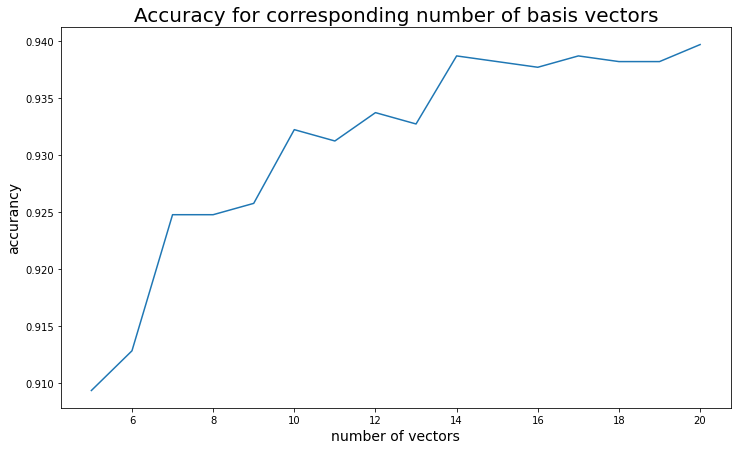

In [15]:
plt.figure(figsize=(12, 7))
plt.title('Accuracy for corresponding number of basis vectors',fontsize=20)
plt.xlabel("number of vectors",fontsize=14)
plt.ylabel("accurancy",fontsize=14)
plt.plot(scores_df["number_of_vectors"], scores_df["scores"])
plt.show()

#### As a result we managed to utilize the simple linear classifier to classify handwritten digits. We approximate the data matrix with a matrix of correct rank k. 
#### In practice, with this implementation we were able to keep all the basic properties of the given matrix intact and get the maximum information from the first dominant singular values.
